## Importing Libraries

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# 1. Data Loading

In [42]:
df = pd.read_csv('dataset.csv')

In [43]:
df.head()



,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11435 entries, 0 to 11434
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11435 non-null  int64  
 1   Property Id                                                 11435 non-null  int64  
 2   Property Name                                               11435 non-null  object 
 3   Parent Property Id                                          11435 non-null  object 
 4   Parent Property Name                                        11434 non-null  object 
 5   BBL - 10 digits                                             11423 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11434 non-null  object 
 7   NYC Building Identification Number (BIN)                    11434 non-null  object 
 

In [45]:
df.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11435.00000,1.143500e+04,1.132000e+04,11434.000000,11434.000000,11434.000000,1.143400e+04,9306.000000,9306.000000,9306.000000,9306.000000,9306.000000
mean,6981.16362,3.637971e+06,1.734282e+05,1948.102589,1.279342,98.743659,1.674509e+05,40.757032,-73.954936,7.215560,15.196217,4751.026327
std,4197.91483,1.048269e+06,3.344619e+05,30.474321,4.029800,7.589679,3.161166e+05,0.078208,0.040790,3.911042,15.210717,12911.508219
min,1.00000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.557052,-74.200825,1.000000,1.000000,1.000000
25%,3338.50000,2.745643e+06,6.514075e+04,1926.000000,1.000000,100.000000,6.693700e+04,40.711388,-73.983827,5.000000,4.000000,100.000000
50%,6745.00000,3.204726e+06,9.309800e+04,1940.000000,1.000000,100.000000,9.410200e+04,40.760457,-73.962327,7.000000,8.000000,200.500000
75%,10760.50000,4.408868e+06,1.592880e+05,1965.000000,1.000000,100.000000,1.584008e+05,40.819450,-73.931580,9.000000,18.000000,520.000000
max,14426.00000,5.991312e+06,1.354011e+07,2016.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


# 2. Data Cleaning

## 2.1. Removing Duplicates

In [46]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

## 2.2. Filtering Columns

In [47]:
df = df[df.columns[[1, 24, 34, 35, 36, 37, 38, 40, 41, 42, 43, 47, 48, 50]]]

## 2.3. Handling Missing Values

In [51]:
df = (df-df.mean()/df.std())

C:\Users\Moaaz\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [52]:
df.head()

,Diesel #2 Use (kBtu),Electricity Use - Grid Purchase (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Natural Gas Use (kBtu),Number of Buildings - Self-reported,Property GFA - Self-Reported (ft²),Property Id,Source EUI (kBtu/ft²),Water Use (All Water Sources) (kgal),Weather Normalized Site Electricity (kWh),Weather Normalized Site Natural Gas Use (therms)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.090875,7.620505e+05,1.328255e+04,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.090875,3.889180e+06,2.839655e+04,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090875,2.313415e+05,4.778223e+06,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090875,1.305747e+06,4.778264e+06,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090875,1.796935e+05,4.778285e+06,NaN,NaN,NaN,NaN


In [53]:
df.corr()

,Number of Buildings - Self-reported,Property GFA - Self-Reported (ft²),Property Id
Number of Buildings - Self-reported,1.000000,0.167115,0.021622
Property GFA - Self-Reported (ft²),0.167115,1.000000,-0.099680
Property Id,0.021622,-0.099680,1.000000


In [8]:
for col in df.columns: 
    new =np.where(df[col]=="Not Available",0,df[col]) 
    df[col]=new
df.head(11)

,Property Id,Number of Buildings - Self-reported,Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Source EUI (kBtu/ft²)
0,13286,2.0,0,0,0,0,0,0,0,38139374.2,1.10827705E7,762051.0,0,619.4
1,28400,12.0,0,1.96248472E7,0,0,0,933073441,9330734.4,332365924,9.62613121E7,3889181.0,0,404.3
2,4778226,1.0,0,0,0,0,0,0,0,0,0,231342.0,0,0
3,4778267,1.0,0,0,0,0,0,0,0,0,0,1305748.0,0,0
4,4778288,1.0,0,0,0,0,0,0,0,0,0,179694.0,0,0
5,28402,12.0,0,2.00832154E7,0,0,0,1.4322508769E9,1.43225088E7,86335350.5,2.45508594E7,2971874.0,0,414.2
6,4778352,1.0,0,0,0,0,0,0,0,0,0,245000.0,0,0
7,2610789,4.0,0,1.37367028E7,0,0,0,394285242148,3.9428524215E9,0,0,2738875.0,107151.5,151172.9
8,2611745,1.0,0,0,0,0,0,0,0,227658.1,63979.9,200.0,19261.1,3574.2
9,3616379,1.0,0,0,0,0,0,0,0,0,0,912892.0,0,0


## 2.4. Handling Outliers

Assert every column is numeric

In [9]:
df = df.apply(pd.to_numeric)

Detect null/na

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 0 to 10792
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Property Id                                       9232 non-null   int64  
 1   Number of Buildings - Self-reported               9232 non-null   float64
 2   Fuel Oil #1 Use (kBtu)                            9232 non-null   float64
 3   Fuel Oil #2 Use (kBtu)                            9232 non-null   float64
 4   Fuel Oil #4 Use (kBtu)                            9232 non-null   float64
 5   Fuel Oil #5 & 6 Use (kBtu)                        9232 non-null   float64
 6   Diesel #2 Use (kBtu)                              9232 non-null   float64
 7   Natural Gas Use (kBtu)                            9232 non-null   float64
 8   Weather Normalized Site Natural Gas Use (therms)  9232 non-null   float64
 9   Electricity Use - 

Exploratory Plots

''

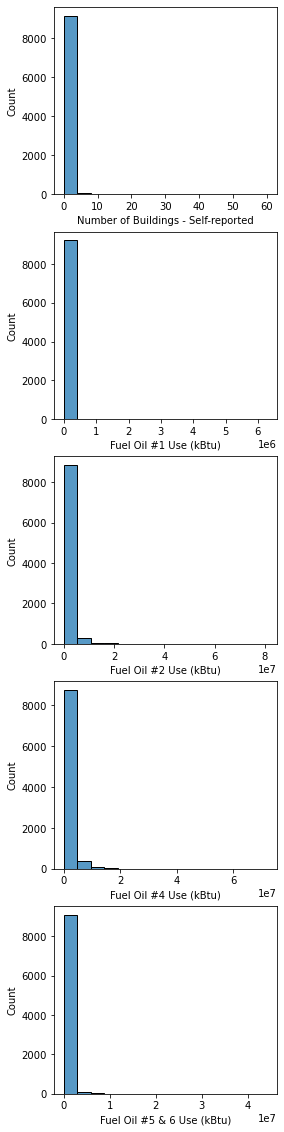

In [25]:
plt.figure(figsize=(4, 4*5))

for i, col in enumerate(df.columns[1:6]):
    plt.subplot(5, 1, i+1)
    sns.histplot(data=df, x=col)
;

''

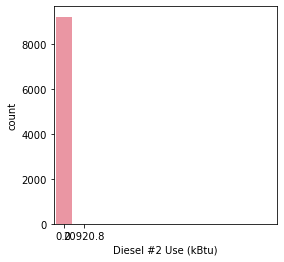

In [37]:
plt.figure(figsize=(4, 4*1))

sns.countplot(data=df, x=df.columns[6])
plt.xticks([0, 1])
;

# 4. Explanatory Data Analysis

In [28]:

# new_NTA =np.where(df["NTA"].isnull(),df["NTA"].mean,df["NTA"])
# df["NTA"]=new_NTA
# new_CensusTract =np.where(df["Census Tract"].isnull(),df["Census Tract"].mean,df["Census Tract"])
# df["Census Tract"]=new_CensusTract
# new_CouncilDistrict =np.where(df["Council District"].isnull(),df["Council District"].mean,df["Council District"])
# df["Council District"]=new_CouncilDistrict
# new_CommunityBoard =np.where(df["Community Board"].isnull(),df["Community Board"].mean,df["Community Board"])
# df["Community Board"]=new_CommunityBoard
# new_Longitude =np.where(df["Longitude"].isnull(),df["Longitude"].mean,df["Longitude"])
# df["Longitude"]=new_Longitude
# new_Latitude =np.where(df["Latitude"].isnull(),df["Latitude"].mean,df["Latitude"])
# df["Latitude"]=new_Latitude
# new_StreetNumber =np.where(df["Street Number"].isnull(),df["Street Number"].mean,df["Street Number"])
# df["Street Number"]=new_StreetNumber
# new_StreetName =np.where(df["Street Name"].isnull(),df["Street Name"].mean,df["Street Name"])
# df["Street Name"]=new_StreetName
# new_Borough =np.where(df["Borough"].isnull(),df["Borough"].mean,df["Borough"])
# df["Borough"]=new_Borough
# new_DOFGrossFloorArea =np.where(df["DOF Gross Floor Area"].isnull(),df["DOF Gross Floor Area"].mean,df["DOF Gross Floor Area"])
# df["DOF Gross Floor Area"]=new_DOFGrossFloorArea
# new_WaterRequired =np.where(df["Water Required?"].isnull(),df["Water Required?"].mean,df["Water Required?"])
# df["Water Required?"]=new_WaterRequired
# new_BBL_10digits =np.where(df["BBL - 10 digits"].isnull(),df["BBL - 10 digits"].mean,df["BBL - 10 digits"])
# df["BBL - 10 digits"]=new_BBL_10digits


total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(20)
# df.describe()

,Total,%
Source EUI (kBtu/ft²),0,0.0
Water Use (All Water Sources) (kgal),0,0.0
Property GFA - Self-Reported (ft²),0,0.0
Weather Normalized Site Electricity (kWh),0,0.0
Electricity Use - Grid Purchase (kBtu),0,0.0
Weather Normalized Site Natural Gas Use (therms),0,0.0
Natural Gas Use (kBtu),0,0.0
Diesel #2 Use (kBtu),0,0.0
Fuel Oil #5 & 6 Use (kBtu),0,0.0
Fuel Oil #4 Use (kBtu),0,0.0


#  chosing wanted columns and drop na

In [29]:
# df = df[df.columns[[1, 24, 34, 35, 36, 37, 38, 40, 41, 42, 43, 47, 48, 50]]]
# df.drop_duplicates(inplace=True)
# df.dropna(inplace=True)


In [30]:
# for col in df.columns:
#    mean = pd.to_numeric(df[col], errors='coerce').mean()
#    df[col].replace('Not Available', mean)
# df.head(11)

In [31]:
df.columns

Index(['Property Id', 'Number of Buildings - Self-reported',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
       'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)',
       'Diesel #2 Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)', 'Source EUI (kBtu/ft²)'],
      dtype='object')

# change Not Available to zero

In [32]:
for col in df.columns: 
    new =np.where(df[col]=="Not Available",0,df[col]) 
    df[col]=new
df.head(11)

,Property Id,Number of Buildings - Self-reported,Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Source EUI (kBtu/ft²)
0,13286,2.0,0,0,0,0,0,0,0,38139374.2,1.10827705E7,762051.0,0,619.4
1,28400,12.0,0,1.96248472E7,0,0,0,933073441,9330734.4,332365924,9.62613121E7,3889181.0,0,404.3
2,4778226,1.0,0,0,0,0,0,0,0,0,0,231342.0,0,0
3,4778267,1.0,0,0,0,0,0,0,0,0,0,1305748.0,0,0
4,4778288,1.0,0,0,0,0,0,0,0,0,0,179694.0,0,0
5,28402,12.0,0,2.00832154E7,0,0,0,1.4322508769E9,1.43225088E7,86335350.5,2.45508594E7,2971874.0,0,414.2
6,4778352,1.0,0,0,0,0,0,0,0,0,0,245000.0,0,0
7,2610789,4.0,0,1.37367028E7,0,0,0,394285242148,3.9428524215E9,0,0,2738875.0,107151.5,151172.9
8,2611745,1.0,0,0,0,0,0,0,0,227658.1,63979.9,200.0,19261.1,3574.2
9,3616379,1.0,0,0,0,0,0,0,0,0,0,912892.0,0,0


# change type of colums

<!-- change type of colums -->

In [33]:
for col in df.columns:
    df[col]=df[col].astype(float)

# compine multi colums

In [34]:
columns_to_sum = ['Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)','Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)', 'Natural Gas Use (kBtu)','Electricity Use - Grid Purchase (kBtu)']
df['Total Energy'] = (df['Weather Normalized Site Natural Gas Use (therms)'] * 100) + (df['Weather Normalized Site Electricity (kWh)'] * 3.4121424501) + (df[columns_to_sum].sum(axis=1))

In [35]:
df['Total Energy']
# df.columns

0        7.595537e+07
1        2.546595e+09
2        0.000000e+00
3        0.000000e+00
4        0.000000e+00
             ...     
10637    2.039869e+07
10640    5.274196e+06
10714    1.338856e+07
10719    5.216155e+06
10792    4.511822e+06
Name: Total Energy, Length: 9232, dtype: float64